*****Part 1*****

Import Libraries

In [223]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, LocalOutlierFactor
from sklearn.svm import SVC, OneClassSVM
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
# ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

***Step 1: Load the dataset***

In [224]:
data1 = pd.read_csv('Crash_Reporting_Drivers_Part1.csv', low_memory=False)
data2 = pd.read_csv('Crash_Reporting_Drivers_Part2.csv', low_memory=False)
data3 = pd.read_csv('Crash_Reporting_Drivers_Part3.csv', low_memory=False)
data4 = pd.read_csv('Crash_Reporting_Drivers_Part4.csv', low_memory=False)
#combine all the datas
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

***Step 2: Data Inspection***

In [226]:
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


In [227]:
data.shape

(189109, 39)

In [228]:
data.dtypes

,0
Report Number,object
Local Case Number,object
Agency Name,object
ACRS Report Type,object
Crash Date/Time,object
Route Type,object
Road Name,object
Cross-Street Name,object
Off-Road Description,object
Municipality,object


***Step 3: Data Cleaning***

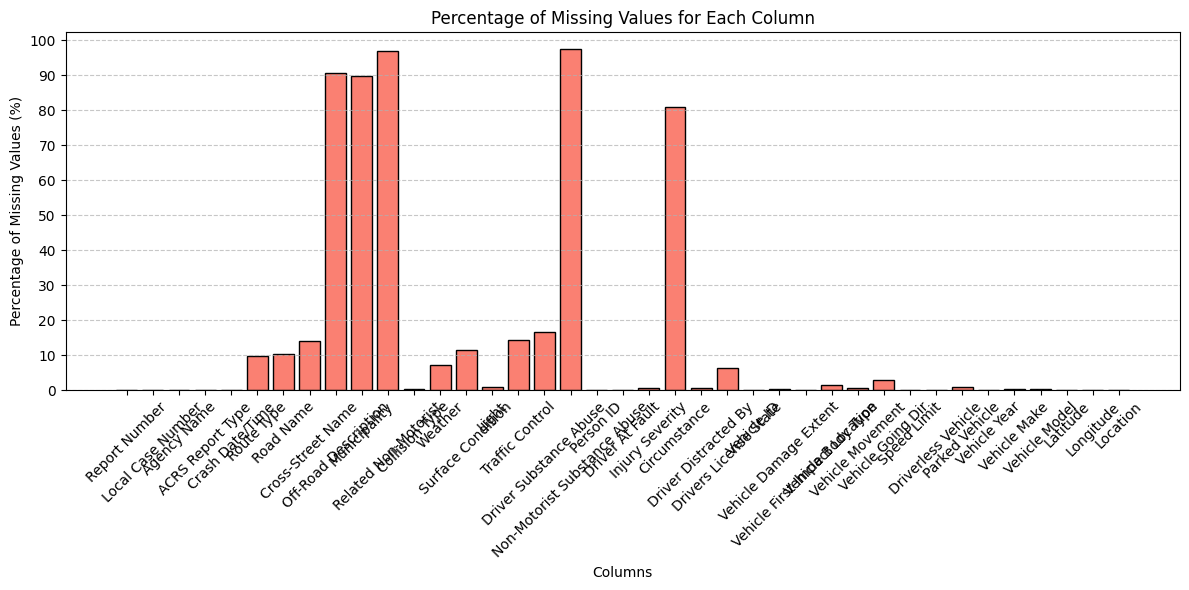

In [229]:
# Calculate the percentage of missing values for each column
missing_values = data.isnull().sum()  # Total missing values per column
total_data = len(data)  # Total number of rows in the dataset
missing_percentage = (missing_values / total_data) * 100  # Calculate percentages

# Create a bar chart to display the percentage of missing values
plt.figure(figsize=(12, 6))
plt.bar(missing_percentage.index, missing_percentage, color='salmon', edgecolor='black')
plt.title('Percentage of Missing Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=45)  # Rotate column labels for better visibility
plt.yticks(range(0, 101, 10))  # clear percentage intervals on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # a grid for easier interpretation
plt.tight_layout()
plt.show()

*****Deleting the columns because over 80% of the data has missing values ​​and the values ​​are categorical so it is very difficult to fill them with other values*****

In [230]:
data.drop(columns=[
    'Non-Motorist Substance Abuse', #184178
    'Related Non-Motorist', #183032
    'Off-Road Description', #171662
    'Municipality', #169983
    'Circumstance' #153245
], inplace=True, errors='ignore')

*****check the values*****

In [231]:
pivot_tables = {}
for column in data.columns:
    pivot_tables[column] = data[column].value_counts()
'''for column, pivot in pivot_tables.items():
    print(f"\n {column}")
    print(pivot)'''
for column, pivot in pivot_tables.items():
    print(f"\n {column} Value Counts:")
    display(pd.DataFrame(pivot))


 Report Number Value Counts:


,count
Report Number,
MCP229800RC,10
MCP12130045,9
MCP2693003Q,9
MCP32800050,9
MCP28810040,8
...,...
MCP29740030,1
MCP9130001T,1
MCP20010008,1



 Local Case Number Value Counts:


,count
Local Case Number,
200022715,10
240024231,9
210022877,9
180051879,9
15000396,8
...,...
220027266,1
200029868,1
210025681,1



 Agency Name Value Counts:


,count
Agency Name,
Montgomery County Police,138376
MONTGOMERY,25061
Rockville Police Departme,9839
Gaithersburg Police Depar,7841
Takoma Park Police Depart,2993
ROCKVILLE,1755
GAITHERSBURG,1434
Maryland-National Capital,1155
TAKOMA,454



 ACRS Report Type Value Counts:


,count
ACRS Report Type,
Property Damage Crash,120674
Injury Crash,67959
Fatal Crash,476



 Crash Date/Time Value Counts:


,count
Crash Date/Time,
12/10/2018 06:10:00 PM,11
03/03/2017 06:00:00 AM,10
06/09/2020 06:53:00 PM,10
03/28/2019 09:30:00 AM,10
03/26/2024 07:45:00 AM,9
...,...
04/27/2019 10:12:00 AM,1
10/26/2018 03:21:00 PM,1
09/19/2017 11:30:00 PM,1



 Route Type Value Counts:


,count
Route Type,
Maryland (State),77077
County,55574
Municipality,9380
US (State),8324
County Route,6036
Maryland (State) Route,5794
Interstate (State),3367
Other Public Roadway,1265
Municipality Route,1235



 Road Name Value Counts:


,count
Road Name,
GEORGIA AVE,11275
NEW HAMPSHIRE AVE,7099
FREDERICK RD,5960
ROCKVILLE PIKE,5023
CONNECTICUT AVE,4288
...,...
GODWIT ST,1
ROYAL FOREST LA,1
WHITE SADDLE DRIVE,1



 Cross-Street Name Value Counts:


,count
Cross-Street Name,
GEORGIA AVE,2225
CONNECTICUT AVE,1662
FREDERICK RD,1628
NEW HAMPSHIRE AVE,1380
VEIRS MILL RD,1309
...,...
PARKING LOT DRIVEWAY,1
ENTRANCE TO MALL,1
BROWNSTONE DR,1



 Collision Type Value Counts:


,count
Collision Type,
SAME DIR REAR END,55759
STRAIGHT MOVEMENT ANGLE,30342
OTHER,19030
SAME DIRECTION SIDESWIPE,16227
SINGLE VEHICLE,15873
HEAD ON LEFT TURN,12926
Front to Rear,5122
SAME DIRECTION RIGHT TURN,3832
HEAD ON,3786



 Weather Value Counts:


,count
Weather,
CLEAR,116781
RAINING,20609
CLOUDY,17295
Clear,13359
Rain,1878
SNOW,1444
Cloudy,1437
UNKNOWN,693
FOGGY,676



 Surface Condition Value Counts:


,count
Surface Condition,
DRY,120577
WET,28429
Dry,12819
Wet,2367
ICE,1058
SNOW,938
UNKNOWN,509
SLUSH,204
OTHER,164



 Light Value Counts:


,count
Light,
DAYLIGHT,116150
DARK LIGHTS ON,39551
Daylight,11922
DARK NO LIGHTS,4967
DUSK,3935
Dark - Lighted,3802
DAWN,3472
DARK -- UNKNOWN LIGHTING,1578
UNKNOWN,677



 Traffic Control Value Counts:


,count
Traffic Control,
NO CONTROLS,68626
TRAFFIC SIGNAL,58898
STOP SIGN,12488
No Controls,7993
Traffic Control Signal,5535
FLASHING TRAFFIC SIGNAL,2132
OTHER,1991
YIELD SIGN,1727
Stop Sign,976



 Driver Substance Abuse Value Counts:


,count
Driver Substance Abuse,
NONE DETECTED,122545
"Not Suspect of Alcohol Use, Not Suspect of Drug Use",14632
UNKNOWN,11990
ALCOHOL PRESENT,4087
"Unknown, Unknown",1763
ALCOHOL CONTRIBUTED,1435
"Suspect of Alcohol Use, Not Suspect of Drug Use",431
ILLEGAL DRUG PRESENT,259
MEDICATION PRESENT,117



 Person ID Value Counts:


,count
Person ID,
CF61C6EB-61C4-4627-9767-635D2F0174A6,1
8DD7A4DC-5EE0-4457-8E9E-8B712E733D3F,1
255C835C-380E-41C6-81FC-822B90BEDAD3,1
71CFB166-83FA-4A58-99A6-99AEA6E6218B,1
47F50369-93CB-4205-B060-69DA9B39E240,1
...,...
7820BA54-ACEE-43C1-8FED-6443CA89FDD0,1
CE9FFE44-3CCF-4E14-9342-6E13E7282648,1
CA1BBD30-68E6-40F5-A96C-D4E6F3095B9B,1



 Driver At Fault Value Counts:


,count
Driver At Fault,
Yes,97804
No,86623
Unknown,4682



 Injury Severity Value Counts:


,count
Injury Severity,
NO APPARENT INJURY,141197
POSSIBLE INJURY,17481
No Apparent Injury,13162
SUSPECTED MINOR INJURY,11871
Suspected Minor Injury,1498
SUSPECTED SERIOUS INJURY,1414
Possible Injury,1129
FATAL INJURY,154
Suspected Serious Injury,141



 Driver Distracted By Value Counts:


,count
Driver Distracted By,
NOT DISTRACTED,106718
UNKNOWN,32803
LOOKED BUT DID NOT SEE,21546
Not Distracted,11235
INATTENTIVE OR LOST IN THOUGHT,4320
Unknown,4030
OTHER DISTRACTION,3245
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT,970
"Other Action (looking away from task, etc.)",533



 Drivers License State Value Counts:


,count
Drivers License State,
MD,156399
DC,5575
VA,5445
XX,1832
PA,1203
...,...
SK,1
NT,1
MX-ROO,1



 Vehicle ID Value Counts:


,count
Vehicle ID,
D3F480EE-638B-459A-BC20-533741BC4F76,1
17E0897B-94D9-42AA-A9C4-7CABDAD6ECF7,1
CC86BBD1-57DF-4986-9C49-E585C1FF6C1A,1
49EA46E2-1002-4B81-825F-50642F97FBFF,1
DFC4E131-A5BD-4455-A9BB-93A3EA5BD01A,1
...,...
941B8BF8-EAB8-45FA-B13A-E949A036A773,1
17B45941-8126-4136-B65A-668084E103E4,1
6626DE9F-DC3B-4630-8AFE-46C32ACB8B17,1



 Vehicle Damage Extent Value Counts:


,count
Vehicle Damage Extent,
DISABLING,62355
FUNCTIONAL,44993
SUPERFICIAL,43877
DESTROYED,7610
Disabling,7258
UNKNOWN,6620
NO DAMAGE,6244
Superficial,4548
Functional,3886



 Vehicle First Impact Location Value Counts:


,count
Vehicle First Impact Location,
TWELVE OCLOCK,68026
SIX OCLOCK,34275
ONE OCLOCK,16197
ELEVEN OCLOCK,13774
TWO OCLOCK,6238
TEN OCLOCK,6191
Twelve O Clock,4995
SEVEN OCLOCK,4279
FOUR OCLOCK,4126



 Vehicle Body Type Value Counts:


,count
Vehicle Body Type,
PASSENGER CAR,119110
(SPORT) UTILITY VEHICLE,15990
Passenger Car,10901
PICKUP TRUCK,6787
VAN,4958
TRANSIT BUS,3642
SCHOOL BUS,2975
Sport Utility Vehicle,2732
POLICE VEHICLE/NON EMERGENCY,2119



 Vehicle Movement Value Counts:


,count
Vehicle Movement,
MOVING CONSTANT SPEED,67240
SLOWING OR STOPPING,24455
STOPPED IN TRAFFIC LANE,18400
MAKING LEFT TURN,16611
ACCELERATING,9659
Moving Constant Speed,6597
BACKING,5783
MAKING RIGHT TURN,5415
CHANGING LANES,4682



 Vehicle Going Dir Value Counts:


,count
Vehicle Going Dir,
North,47647
South,46687
East,35297
West,34766
Unknown,5474
Northbound,3901
Southbound,3606
Eastbound,2756
Westbound,2554



 Speed Limit Value Counts:


,count
Speed Limit,
35,56305
40,35882
25,26600
30,25968
45,13237
15,6419
0,6257
50,5039
55,4325



 Driverless Vehicle Value Counts:


,count
Driverless Vehicle,
No,188365
Unknown,744



 Parked Vehicle Value Counts:


,count
Parked Vehicle,
No,184559
Yes,3016



 Vehicle Year Value Counts:


,count
Vehicle Year,
2015,12915
2014,12543
2016,12345
2013,11748
2017,10293
...,...
2208,1
2041,1
2200,1



 Vehicle Make Value Counts:


,count
Vehicle Make,
TOYOTA,26397
HONDA,21338
FORD,18725
NISSAN,9536
TOYT,8841
...,...
MAZFA,1
SATRUN,1
5NPEC4AB5EH926862,1



 Vehicle Model Value Counts:


,count
Vehicle Model,
4S,13753
TK,10980
CAMRY,6894
CIVIC,6255
COROLLA,6210
...,...
SEMI TRACTOR,1
R330,1
PIL,1



 Latitude Value Counts:


,count
Latitude,
38.953000,45
39.113428,29
39.045425,26
39.046277,24
39.079976,20
...,...
39.052638,1
39.077037,1
38.975652,1



 Longitude Value Counts:


,count
Longitude,
-77.338000,45
-77.236482,29
-76.990695,27
-76.990737,26
-77.138263,20
...,...
-76.967540,1
-77.247198,1
-76.993639,1



 Location Value Counts:


,count
Location,
"(38.953, -77.338)",45
"(39.11342767, -77.23648183)",29
"(39.045425, -76.99073667)",26
"(39.04627667, -76.990695)",24
"(39.07997592, -77.13826298)",20
...,...
"(38.99828871, -77.06589234)",1
"(39.13784137, -77.17898726)",1
"(38.99449764, -77.03621864)",1


*****Remove irrelevant columns*****

In [232]:
 data.drop(columns=[
    'Location', #location irrelevant to our prediction
    'Longitude', #location irrelevant to our prediction
    'Latitude', #location irrelevant to our prediction
     'Route Type',#location irrelevant to our prediction
    'Vehicle ID', #unique key irrelevant to our prediction
    'Drivers License State',#Indicates where the license was issued irrelevant to our prediction
    'Person ID', #unique key irrelevant to our prediction
    'Cross-Street Name', #location irrelevant to our prediction
     'Road Name', #location irrelevant to our prediction
     'Agency Name', #police station name irrelevant to our prediction
    'Local Case Number', #unique key irrelevant to our prediction
     'Report Number' #unique key irrelevant to our prediction
], inplace=True, errors='ignore')

In [233]:
 data.drop(columns=[
     'Driverless Vehicle',# 99% of the values is "no" and all the other is unknown irrelevant column to our prediction
     'Driver Substance Abuse'# 122545 "NONE DETECTED" values irrelevant column to our prediction
], inplace=True, errors='ignore')

# Remove columns that might interrupt prediction
data.drop(columns=['Vehicle Damage Extent'], inplace=True, errors='ignore')

# Handle specific column transformations
# Remove rows with NA or specific values in specified columns
data = data[(data['Vehicle Make'].notna()) & (data['Vehicle Make'] != 'Unknown')]
data = data[(data['Vehicle Year'].notna()) & (data['Vehicle Year'] != 0)]
data = data[(data['Vehicle Going Dir'].notna()) & (data['Vehicle Going Dir'] != 'Unknown')]
data = data[(data['Vehicle Movement'].notna()) & (data['Vehicle Movement'] != 'UNKNOWN')]
data = data[(data['Vehicle First Impact Location'].notna()) & (data['Vehicle First Impact Location'] != 'UNKNOWN')]

data['Parked Vehicle'] = data['Parked Vehicle'].replace(['nan', ''], np.nan)
data = data.dropna(subset=['Parked Vehicle'])
data['Parked Vehicle'] = data['Parked Vehicle'].replace({'Yes': 1, 'No': 0})

# Remove rows where 'Driver At Fault' is 'Unknown'
data = data[data['Driver At Fault'] != 'Unknown']
data['Driver At Fault'] = data['Driver At Fault'].replace({'Yes': 1, 'No': 0})

#handeling unknowns and types
data['Speed Limit'] = data['Speed Limit'].astype(int)
data['Vehicle Body Type'].fillna('OTHER', inplace=True)
data['Driver Distracted By'].fillna('UNKNOWN', inplace=True)
data['Traffic Control'].fillna('UNKNOWN', inplace=True)
data['Light'].fillna('UNKNOWN', inplace=True)
data['Surface Condition'].fillna('UNKNOWN', inplace=True)
data['Weather'].fillna('UNKNOWN', inplace=True)
data['Collision Type'].fillna('UNKNOWN', inplace=True)


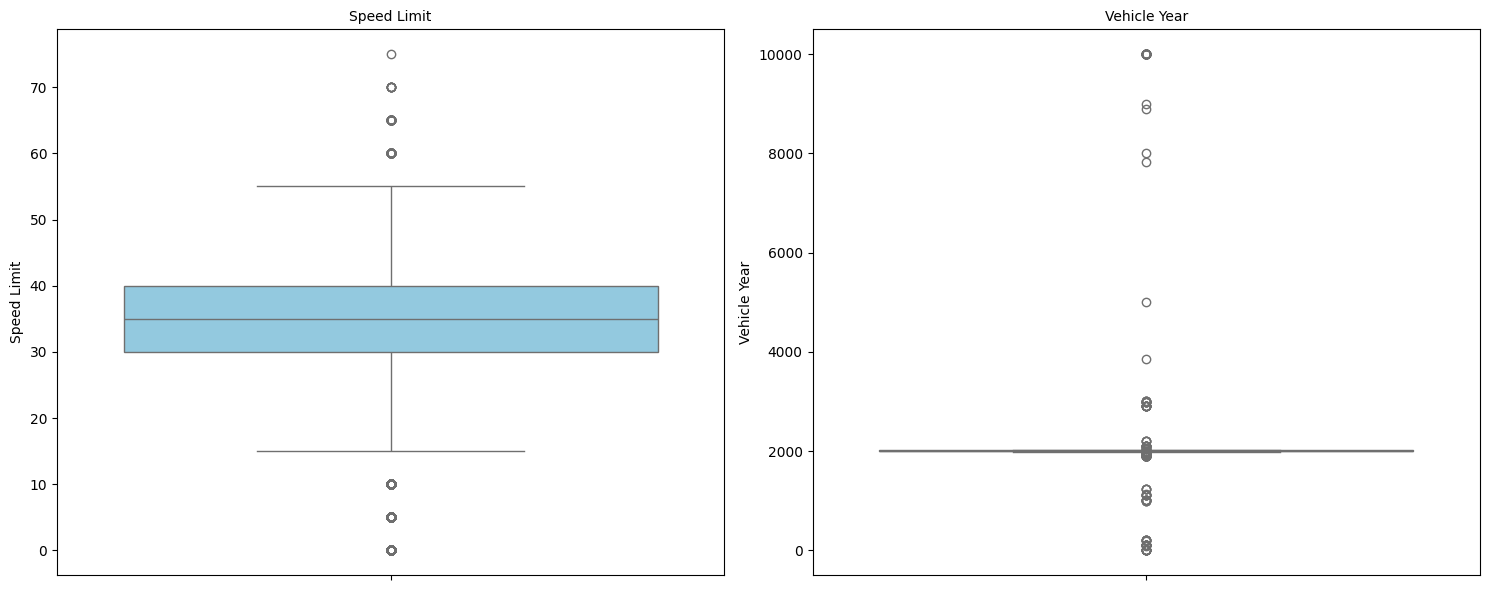

In [234]:
# only integers
numeric_columns = data[['Speed Limit', 'Vehicle Year']]

# Boxplot
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns.columns), figsize=(15, 6), sharey=False)

for i, column in enumerate(numeric_columns.columns):
    sns.boxplot(y=numeric_columns[column], ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('')

#
plt.tight_layout()
plt.show()


In [235]:
# According to the boxplot, remove outliers.
data = data[(data['Vehicle Year'] >= 1940) & (data['Vehicle Year'] <= 2025)]
data = data[(data['Speed Limit'] > 10) ]


*****combine same values*****

In [236]:
#combine same values on Collision Type
collision_mapping = {
    'SINGLE VEHICLE': 'Single Vehicle',
    'Single Vehicle': 'Single Vehicle',
    'SAME DIR REAR END': 'Rear End',
    'SAME DIR REND LEFT TURN': 'Rear End',
    'SAME DIR REND RIGHT TURN': 'Rear End',
    'Rear To Rear': 'Rear End',
    'Rear To Side': 'Rear End',
    'STRAIGHT MOVEMENT ANGLE': 'Angle',
    'ANGLE MEETS LEFT TURN': 'Angle',
    'ANGLE MEETS RIGHT TURN': 'Angle',
    'ANGLE MEETS LEFT HEAD ON': 'Angle',
    'Angle': 'Angle',
    'SAME DIRECTION SIDESWIPE': 'Sideswipe',
    'OPPOSITE DIRECTION SIDESWIPE': 'Sideswipe',
    'Sideswipe, Same Direction': 'Sideswipe',
    'Sideswipe, Opposite Direction': 'Sideswipe',
    'HEAD ON': 'Head On',
    'HEAD ON LEFT TURN': 'Head On',
    'Front to Front': 'Head On',
    'OTHER': 'Other/Unknown',
    'UNKNOWN': 'Other/Unknown',
    'Other': 'Other/Unknown',
    'Unknown': 'Other/Unknown',
    'Front to Rear': 'Front to Rear'
}


data['Collision Type'] = data['Collision Type'].replace(collision_mapping)

#combine same values on weather
weather_mapping = {
    'CLEAR': 'Clear',
    'Clear': 'Clear',
    'CLOUDY': 'Cloudy',
    'Cloudy': 'Cloudy',
    'RAINING': 'Rain',
    'Rain': 'Rain',
    'Freezing Rain Or Freezing Drizzle': 'Rain',
    'SNOW': 'Snow',
    'Snow': 'Snow',
    'SLEET': 'Snow',
    'Sleet Or Hail': 'Snow',
    'Blowing Snow': 'Snow',
    'WINTRY MIX': 'Snow',
    'FOGGY': 'Fog',
    'Fog, Smog, Smoke': 'Fog',
    'SEVERE WINDS': 'Severe Winds',
    'Severe Crosswinds': 'Severe Winds',
    'BLOWING SAND, SOIL, DIRT': 'Blowing Sand/Dirt',
    'UNKNOWN': 'Unknown/Other',
    'OTHER': 'Unknown/Other',
    'Unknown': 'Unknown/Other'
}

data['Weather'] = data['Weather'].replace(weather_mapping)

#combine same values on Surface Condition
surface_mapping = {
    'DRY': 'Dry',
    'Dry': 'Dry',
    'WET': 'Wet',
    'Wet': 'Wet',
    'WATER(STANDING/MOVING)': 'Wet',
    'Water (standing, moving)': 'Wet',
    'SNOW': 'Snow',
    'Snow': 'Snow',
    'SLUSH': 'Snow',
    'Slush': 'Snow',
    'ICE': 'Ice',
    'Ice/Frost': 'Ice',
    'MUD, DIRT, GRAVEL': 'Mud/Dirt/Gravel',
    'Mud, Dirt, Gravel': 'Mud/Dirt/Gravel',
    'SAND': 'Sand',
    'Sand': 'Sand',
    'OIL': 'Oil',
    'UNKNOWN': 'Unknown/Other',
    'OTHER': 'Unknown/Other',
    'Other': 'Unknown/Other'
}


data['Surface Condition'] = data['Surface Condition'].replace(surface_mapping)

# combine same values on Light
light_mapping = {
    'DAYLIGHT': 'Daylight',
    'Daylight': 'Daylight',
    'DARK LIGHTS ON': 'Dark - Lighted',
    'Dark - Lighted': 'Dark - Lighted',
    'DUSK': 'Dusk',
    'Dusk': 'Dusk',
    'DAWN': 'Dawn',
    'Dawn': 'Dawn',
    'DARK NO LIGHTS': 'Dark - Not Lighted',
    'Dark - Not Lighted': 'Dark - Not Lighted',
    'OTHER': 'Other',
    'Other': 'Other',
    'UNKNOWN': 'Unknown',
    'Unknown': 'Unknown',
    'DARK -- UNKNOWN LIGHTING': 'Dark - Unknown Lighting',
    'Dark - Unknown Lighting': 'Dark - Unknown Lighting'
}

data['Light'] = data['Light'].replace(light_mapping)

# combine same values on Traffic Control
traffic_control_mapping = {
    'UNKNOWN': 'Unknown/Other',
    'Other': 'Unknown/Other',
    'OTHER': 'Unknown/Other',
    'STOP SIGN': 'Stop Sign',
    'Stop Sign': 'Stop Sign',
    'NO CONTROLS': 'No Controls',
    'No Controls': 'No Controls',
    'TRAFFIC SIGNAL': 'Traffic Signal',
    'Traffic Control Signal': 'Traffic Signal',
    'PERSON': 'Person (including flagger, law enforcement, crossing guard, etc.)',
    'Person (including flagger, law enforcement, crossing guard, etc.': 'Person (including flagger, law enforcement, crossing guard, etc.)',
    'FLASHING TRAFFIC SIGNAL': 'Flashing Traffic Signal',
    'Flashing Traffic Control Signal': 'Flashing Traffic Signal',
    'YIELD SIGN': 'Yield Sign',
    'Yield Sign': 'Yield Sign',
    'WARNING SIGN': 'Warning Sign',
    'Other Signal': 'Other Signal',
    'SCHOOL ZONE SIGN DEVICE': 'School Zone Sign',
    'School Zone Sign': 'School Zone Sign',
    'RAILWAY CROSSING DEVICE': 'Railway Crossing Device',
    'Pedestrian Crossing Sign': 'Pedestrian Crossing Sign',
    'Other Pavement Marking (excluding edgelines, centerlines, or lane lines)': 'Other Pavement Marking',
    'Other Warning Sign': 'Warning Sign',
    'Lane Use Control Signal': 'Lane Use Control Signal',
    'Pedestrian Crossing': 'Pedestrian Crossing',
    'Intersection Ahead Warning Sign': 'Intersection Ahead Warning Sign',
    'Curve Ahead Warning Sign': 'Curve Ahead Warning Sign',
    'Ramp Meter Signal': 'Ramp Meter Signal',
    'Reduce Speed Ahead Warning Sign': 'Reduce Speed Ahead Warning Sign',
    'Bicycle Crossing Sign': 'Bicycle Crossing Sign',
    'School Zone': 'School Zone Sign'
}

data['Traffic Control'] = data['Traffic Control'].replace(traffic_control_mapping)

# combine same values on Driver Distracted By
driver_distracted_mapping = {
    'NOT DISTRACTED': 'Not Distracted',
    'Not Distracted': 'Not Distracted',
    'LOOKED BUT DID NOT SEE': 'Looked but did not see',
    'UNKNOWN': 'Unknown',
    'Unknown': 'Unknown',
    'INATTENTIVE OR LOST IN THOUGHT': 'Inattentive or Lost in Thought',
    'TALKING OR LISTENING TO CELLULAR PHONE': 'Talking or Listening to Cellular Phone',
    'OTHER DISTRACTION': 'Other Distraction',
    'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT': 'Distracted by Outside Person/Object/Event',
    'EATING OR DRINKING': 'Eating or Drinking',
    'BY MOVING OBJECT IN VEHICLE': 'Distracted by Moving Object in Vehicle',
    'BY OTHER OCCUPANTS': 'Distracted by Other Occupants',
    'ADJUSTING AUDIO AND OR CLIMATE CONTROLS': 'Adjusting Audio/Climate Controls',
    'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)': 'Other Electronic Device (Navigational)',
    'OTHER CELLULAR PHONE RELATED': 'Other Cellular Phone Related',
    'NO DRIVER PRESENT': 'No Driver Present',
    'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE': 'Using Other Device Controls in Vehicle',
    'USING DEVICE OBJECT BROUGHT INTO VEHICLE': 'Using Device/Objects Brought into Vehicle',
    'DIALING CELLULAR PHONE': 'Dialing Cellular Phone',
    'TEXTING FROM A CELLULAR PHONE': 'Texting from Cellular Phone',
    'SMOKING RELATED': 'Smoking Related',
    'Other Action (looking away from task, etc.)': 'Other Action (Looking away from task)',
    'Talking/listening': 'Talking or Listening to Cellular Phone',
    'Manually Operating (dialing, playing game, etc.)': 'Manually Operating Device'
}

data['Driver Distracted By'] = data['Driver Distracted By'].replace(driver_distracted_mapping)

# combine same values on Vehicle First Impact Location
vehicle_impact_mapping = {
    'SIX OCLOCK': 'Six O Clock',
    'Six O Clock': 'Six O Clock',
    'TWELVE OCLOCK': 'Twelve O Clock',
    'Twelve O Clock': 'Twelve O Clock',
    'NINE OCLOCK': 'Nine O Clock',
    'Nine O Clock': 'Nine O Clock',
    'ONE OCLOCK': 'One O Clock',
    'One O Clock': 'One O Clock',
    'TEN OCLOCK': 'Ten O Clock',
    'Ten O Clock': 'Ten O Clock',
    'FOUR OCLOCK': 'Four O Clock',
    'Four O Clock': 'Four O Clock',
    'SEVEN OCLOCK': 'Seven O Clock',
    'Seven O Clock': 'Seven O Clock',
    'EIGHT OCLOCK': 'Eight O Clock',
    'Eight O Clock': 'Eight O Clock',
    'THREE OCLOCK': 'Three O Clock',
    'Three O Clock': 'Three O Clock',
    'ELEVEN OCLOCK': 'Eleven O Clock',
    'Eleven O Clock': 'Eleven O Clock',
    'FIVE OCLOCK': 'Five O Clock',
    'Five O Clock': 'Five O Clock',
    'TWO OCLOCK': 'Two O Clock',
    'Two O Clock': 'Two O Clock',
    'ROOF TOP': 'Roof Top',
    'Top': 'Roof Top',
    'UNDERSIDE': 'Underside',
    'Non-Collision': 'Non-Collision',
    'NON-COLLISION': 'Non-Collision',
    'Vehicle Not at Scene': 'Vehicle Not at Scene',
    'Cargo Loss': 'Cargo Loss'
}

data['Vehicle First Impact Location'] = data['Vehicle First Impact Location'].replace(vehicle_impact_mapping)

# combine same values on Vehicle Body Type
vehicle_body_mapping = {
    'PASSENGER CAR': 'Passenger Car',
    'Passenger Car': 'Passenger Car',
    '(SPORT) UTILITY VEHICLE': 'Sport Utility Vehicle',
    'Sport Utility Vehicle': 'Sport Utility Vehicle',
    'POLICE VEHICLE/EMERGENCY': 'Police Vehicle/Emergency',
    'POLICE VEHICLE/NON EMERGENCY': 'Police Vehicle/Non Emergency',
    'POLICE VEHICLE/EMERGENCY': 'Police Vehicle/Emergency',
    'VAN': 'Van',
    'Van - Passenger (&lt;9 Seats)': 'Van',
    'TRANSIT BUS': 'Transit Bus',
    'AMBULANCE/EMERGENCY': 'Ambulance/Emergency',
    'AMBULANCE/NON EMERGENCY': 'Ambulance/Non Emergency',
    'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)': 'Other Light Trucks',
    'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)': 'Other Light Trucks',
    'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))': 'Medium/Heavy Trucks',
    'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))': 'Cargo Van/Light Truck',
    'SNOWMOBILE': 'Snowmobile',
    'MOTORCYCLE': 'Motorcycle',
    'Moped Or motorized bicycle': 'Moped',
    'PICKUP TRUCK': 'Pickup Truck',
    'RECREATIONAL VEHICLE': 'Recreational Vehicle',
    'FIRE VEHICLE/EMERGENCY': 'Fire Vehicle/Emergency',
    'STATION WAGON': 'Station Wagon',
    'OTHER BUS': 'Other Bus',
    'CROSS COUNTRY BUS': 'Cross Country Bus',
    'ALL TERRAIN VEHICLE (ATV)': 'All Terrain Vehicle (ATV)',
    'FIRE VEHICLE/NON EMERGENCY': 'Fire Vehicle/Non Emergency',
    'TRUCK TRACTOR': 'Truck Tractor',
    'AUTOCYCLE': 'Autocycle',
    'FARM VEHICLE': 'Farm Vehicle',
    'LOW SPEED VEHICLE': 'Low Speed Vehicle',
    'LIMOUSINE': 'Limousine',
    'Bus - School': 'School Bus',
    'Single-Unit Truck': 'Single-Unit Truck',
    'Other Trucks': 'Other Trucks',
    'Bus - Transit': 'Transit Bus',
    'Van - Cargo': 'Cargo Van',
    'Motorcycle - 2 Wheeled': 'Motorcycle',
    'Truck Tractor': 'Truck Tractor',
    'Station Wagon': 'Station Wagon',
    'Bus - Other Type': 'Other Bus',
    'All-Terrain Vehicle/All-Terrain Cycle (ATV/ATC)': 'All Terrain Vehicle (ATV)',
    'Farm Equipment (Tractor, combine harvester, etc.)': 'Farm Vehicle',
    'Motorcycle - 3 Wheeled': 'Motorcycle',
    'Recreational Off-Highway Vehicles (ROV)': 'Recreational Vehicle',
    'Bus - Cross Country': 'Cross Country Bus',
    'Construction Equipment (backhoe, bulldozer, etc.)': 'Construction Equipment',
    'Van - Passenger (9 or 12 Seats)': 'Van',
    'Van - Passenger (15 Seats)': 'Van'
}

data['Vehicle Body Type'] = data['Vehicle Body Type'].replace(vehicle_body_mapping)

# combine same values on Vehicle Movement
vehicle_movement_mapping = {
    'BACKING': 'Backing',
    'Backing': 'Backing',
    'MOVING CONSTANT SPEED': 'Moving Constant Speed',
    'Moving Constant Speed': 'Moving Constant Speed',
    'SLOWING OR STOPPING': 'Slowing or Stopping',
    'Slowing or Stopping': 'Slowing or Stopping',
    'STOPPED IN TRAFFIC LANE': 'Stopped in Traffic Lane',
    'Stopped in Traffic Lane': 'Stopped in Traffic Lane',
    'MAKING LEFT TURN': 'Making Left Turn',
    'Turning Left': 'Making Left Turn',
    'ACCELERATING': 'Accelerating',
    'Accelerating': 'Accelerating',
    'STARTING FROM LANE': 'Starting from Lane',
    'STARTING FROM PARKED': 'Starting from Parked',
    'PARKING': 'Parking',
    'Parking': 'Parking',
    'CHANGING LANES': 'Changing Lanes',
    'Changing Lanes': 'Changing Lanes',
    'MAKING RIGHT TURN': 'Making Right Turn',
    'Turning Right': 'Making Right Turn',
    'NEGOTIATING A CURVE': 'Negotiating a Curve',
    'Negotiating a Curve': 'Negotiating a Curve',
    'RIGHT TURN ON RED': 'Right Turn on Red',
    'SKIDDING': 'Skidding',
    'PASSING': 'Passing',
    'Overtaking/Passing': 'Passing',
    'MAKING U TURN': 'Making U Turn',
    'Making U-Turn': 'Making U Turn',
    'OTHER': 'Other',
    'Other': 'Other',
    'ENTERING TRAFFIC LANE': 'Entering Traffic Lane',
    'Entering Traffic Lane': 'Entering Traffic Lane',
    'LEAVING TRAFFIC LANE': 'Leaving Traffic Lane',
    'Leaving Traffic Lane': 'Leaving Traffic Lane',
    'DRIVERLESS MOVING VEH.': 'Driverless Moving Vehicle',
    'Driverless Moving Vehicle': 'Driverless Moving Vehicle'
}

data['Vehicle Movement'] = data['Vehicle Movement'].replace(vehicle_movement_mapping)

# combine same values on Vehicle Going Dir
vehicle_going_dir_mapping = {
    'West': 'West',
    'Westbound': 'West',
    'South': 'South',
    'Southbound': 'South',
    'East': 'East',
    'Eastbound': 'East',
    'North': 'North',
    'Northbound': 'North',
    'Not On Roadway': 'Not On Roadway'
}

data['Vehicle Going Dir'] = data['Vehicle Going Dir'].replace(vehicle_going_dir_mapping)


# combine same values on Vehicle Going Dir
brand_mapping = {
    "Audi": ["Audi", "AUDI", "Audy", "AuDi", "AUDY"],
    "Mercedes-Benz": ["Mercedes-Benz", "Mercedes", "Merc", "Mercedez", "MERCEDES BENZ", "Merce", "MERCEDES-BENZ", "MB", "MERCEDESBENZ", "MERS-BENZ"],
    "Honda": ["Honda","HINDA", "HONDA", "Hnda", "Hona", "Honnda", "HOND", "HONDD", "HONAD", "HODA", "HOONDA", "HONAD", "HIONDA"],
    "Toyota": ["Toyota","TOTOYTA", "TOYOTA", "Toyta", "Toyotta", "TOYO", "TOYOT", "TOYOTS", "TOYITA", "TYOTA", "TOYOOTA", "TOYOTAY", "TOYOATA"],
    "GILLIG": ["GILLIG", "GILIG", "Gillig", "GILG", "GILLG", "GILLLIG", "GILLIGE", "GILLIAN", "GILLI"],
    "Freightliner": ["Freightliner", "FREIGHTLINER", "Frieghtliner", "Frghtliner", "FRHT", "FRIEGHTLINER", "FREIGHT LINER", "FRHTLINER", "FREIGHTLNR"],
    "MIFU": ["MIFU", "Mifu", "MIFU Motors"],
    "Mazda": ["Mazda", "MAZDA", "Mazada", "Mazd", "Madza", "MAZD"],
    "Chevrolet": ["Chevrolet", "CHEVROLET", "Chevy", "CHEVY", "CHEVROLETE", "CHEVROLT", "CHEVEROLET", "CEVROLET", "CHEV", "CHEVROLETTE"],
    "Ford": ["Ford", "FORD", "Frod", "FOR", "FORED", "FORD BUS", "F250", "FOCUS", "FORD TRUCK"],
    "NWFL": ["NWFL", "New Flyer", "NEW FLYER", "NEWFLYER", "NFWL", "NEW FYLER", "NEW FLYER TRANSIT"],
    "Jeep": ["Jeep", "JEEP", "Jeap", "Jep", "JEEP GN", "JEEPVAL2013", "CHEROKEE", "JEEPG"],
    "Volkswagen": ["Volkswagen", "VOLKSWAGEN", "VW", "Volkswagon", "VOLKSWGN", "VOLKSWAGGON", "VOLKSWGEN", "VOKSWAGON", "VOLKSWAGAN", "VOLSWAGON"],
    "Nissan": ["Nissan","NSSAN", "NISSAN", "Nisan", "NISAN", "NISSAB", "NISSA", "NISSAN DIESEL", "NISSAM", "NISSAS"],
    "Hyundai": ["Hyundai","HYANDAI", "HYUNDAI", "Hundai", "HYUNDI", "HUYNDAI", "HYUNDI", "HYU", "HUNDI", "HYUNDAU", "HYUNDAIA"],
    "Kia": ["Kia", "KIA", "Kea", "KIYA", "KISA"],
    "Subaru": ["Subaru", "SUBARU", "Sabaru", "SUBURA", "SUBU", "SUBARUR", "SUBRU", "SUBAVAL1997"],
    "Dodge": ["Dodge", "DODGE", "Doge", "Dodg", "DOGE", "DODG", "DDOGE", "DOAGE", "DODGE RAM", "DODGVAL2013"],
    "GMC": ["GMC", "G.M.C", "General Motors Company", "GM", "GMV"],
    "Acura": ["Acura", "ACURA", "Acurra", "ACCU", "ACUA", "ACUAR", "ACURA"],
    "Lexus": ["Lexus", "LEXUS", "Lexsus", "Lex", "LEXES", "LEXSUS", "LUXUS"],
    "Ferrari": ["Ferrari", "FERRARI", "Ferari", "Ferrary", "FERR", "FER", "FERRAR"],
    "Cadillac": ["Cadillac", "CADILLAC", "Cadilac", "CADILACC", "CADALLAC", "CADILLIC", "CADILLAC", "CADALAC"],
    "Chrysler": ["Chrysler", "CHRYSLER", "Chryslar", "CHRYSTLER", "CHRYLSER", "CRYSLER", "CHYR", "CHRYSLE"],
    "Volvo": ["Volvo", "VOLVO", "Volva", "VOVLO", "VOLV", "VOLVO TRUCK", "VOLO", "VOLSWAGON"],
    "Infiniti": ["Infiniti","INFINTY", "INFINITI", "Infinit", "INFIN", "INFINITI", "INIFINITY"],
    "Mack": ["Mack", "MACK", "MAC", "MACK TRUCKS"],
}

# Function to correct values in a column
def clean_value(value, mapping):
    for correct, variations in mapping.items():
        if str(value).upper() in [v.upper() for v in variations]:
            return correct
    return value  # If no match is found, we leave the value as is

# Apply the function to the column
data['Vehicle Make'] = data['Vehicle Make'].apply(lambda x: clean_value(x, brand_mapping))


print(data['Vehicle Make'].value_counts())

Vehicle Make
Honda                23650
Toyota               22738
Ford                 15531
Chevrolet             9872
Nissan                8206
                     ...  
UBA                      1
SMART CAR                1
5NMZU3LB7JH071949        1
EBIKEWHOLESALE           1
FISKER                   1
Name: count, Length: 1599, dtype: int64


In [237]:
##code by gpt##
#Removes values that appear once to remove errors
# Calculates the number of occurrences of each value in 'Vehicle Make' and 'Vehicle Model'
columns_to_check = ['Vehicle Make', 'Vehicle Model']

for column in columns_to_check:
    # Calculates the number of occurrences of each value in the column
    value_counts = data[column].value_counts()

   # Filter the data so that only the values with a quantity greater than or equal to ten remain.
    values_to_keep = value_counts[value_counts > 9].index
    data = data[data[column].isin(values_to_keep)]


In [238]:
# Move 'ACRS Report Type' column to the last position
data = data[[col for col in data.columns if col != 'ACRS Report Type'] + ['ACRS Report Type']]


In [239]:
data.head()

,Crash Date/Time,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle First Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,ACRS Report Type
2,08/17/2018 02:25:00 PM,Other/Unknown,Clear,Unknown/Other,Daylight,Unknown/Other,1,NO APPARENT INJURY,Not Distracted,Six O Clock,Passenger Car,Backing,West,15,0,2015,Mazda,TK,Property Damage Crash
4,12/06/2023 06:42:00 PM,Angle,Clear,Dry,Dark - Lighted,Stop Sign,0,NO APPARENT INJURY,Not Distracted,Twelve O Clock,Passenger Car,Moving Constant Speed,South,35,0,2017,Audi,A3,Property Damage Crash
6,07/27/2023 12:30:00 PM,Angle,Clear,Dry,Daylight,No Controls,0,NO APPARENT INJURY,Not Distracted,Nine O Clock,Passenger Car,Moving Constant Speed,East,30,0,2022,Honda,PILOT,Property Damage Crash
8,11/10/2023 08:24:00 PM,Rear End,Clear,Dry,Dark - Lighted,Traffic Signal,0,NO APPARENT INJURY,Not Distracted,Six O Clock,Passenger Car,Stopped in Traffic Lane,South,35,0,2016,Toyota,CAMRY,Property Damage Crash
9,10/16/2023 07:33:00 PM,Head On,Clear,Dry,Dark - Lighted,No Controls,1,NO APPARENT INJURY,Looked but did not see,One O Clock,Passenger Car,Making Left Turn,South,35,0,2021,Honda,ACCORD,Property Damage Crash


In [240]:
# List of columns where we want to remove the "Unknown" and "Other" values
columns_to_clean = ['ACRS Report Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
                    'Traffic Control', 'Driver At Fault', 'Driver Distracted By', 'Vehicle First Impact Location',
                    'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
                    'Parked Vehicle', 'Vehicle Year', 'Vehicle Make','Vehicle Model']

# Removing "Unknown" and "Other" values in all columns
for column in columns_to_clean:
    data[column] = data[column].replace(['Unknown', 'Other','Unknown/Other','Other/Unknown'], pd.NA)


data.dropna(inplace=True)


In [241]:
data.head()

,Crash Date/Time,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle First Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,ACRS Report Type
4,12/06/2023 06:42:00 PM,Angle,Clear,Dry,Dark - Lighted,Stop Sign,0,NO APPARENT INJURY,Not Distracted,Twelve O Clock,Passenger Car,Moving Constant Speed,South,35,0,2017,Audi,A3,Property Damage Crash
6,07/27/2023 12:30:00 PM,Angle,Clear,Dry,Daylight,No Controls,0,NO APPARENT INJURY,Not Distracted,Nine O Clock,Passenger Car,Moving Constant Speed,East,30,0,2022,Honda,PILOT,Property Damage Crash
8,11/10/2023 08:24:00 PM,Rear End,Clear,Dry,Dark - Lighted,Traffic Signal,0,NO APPARENT INJURY,Not Distracted,Six O Clock,Passenger Car,Stopped in Traffic Lane,South,35,0,2016,Toyota,CAMRY,Property Damage Crash
9,10/16/2023 07:33:00 PM,Head On,Clear,Dry,Dark - Lighted,No Controls,1,NO APPARENT INJURY,Looked but did not see,One O Clock,Passenger Car,Making Left Turn,South,35,0,2021,Honda,ACCORD,Property Damage Crash
10,09/30/2023 10:34:00 AM,Angle,Cloudy,Dry,Daylight,No Controls,0,NO APPARENT INJURY,Not Distracted,Twelve O Clock,Passenger Car,Moving Constant Speed,West,35,0,2002,Honda,ACCORD,Property Damage Crash


In [242]:
data.isnull().sum().sort_values()

,0
Crash Date/Time,0
Vehicle Make,0
Vehicle Year,0
Parked Vehicle,0
Speed Limit,0
Vehicle Going Dir,0
Vehicle Movement,0
Vehicle Body Type,0
Vehicle Model,0
Vehicle First Impact Location,0


***Step 4: Feature Engineering***

In [244]:
# rating severity by injury type
severity_mapping = {
    "NO APPARENT INJURY": 0.0,
    "No Apparent Injury": 0.0,
    "POSSIBLE INJURY": 0.2,
    "Possible Injury": 0.2,
    "SUSPECTED MINOR INJURY": 0.4,
    "Suspected Minor Injury": 0.4,
    "SUSPECTED SERIOUS INJURY": 0.7,
    "Suspected Serious Injury": 0.7,
    "FATAL INJURY": 1.0,
    "Fatal Injury": 1.0
}

data["Severity"] = data["Injury Severity"].map(severity_mapping)
data.drop(columns=[ "Injury Severity" ], inplace=True, errors='ignore')

#code by gpt
# Convert to a time column and extract the time
data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
data['Hour'] = data['Crash Date/Time'].dt.hour

#Determining the level of danger by hour
# Based on data on the number of accidents per hour (2023)
#https://cars.walla.co.il/item/3633003

# Data on the number of deaths by hour
hourly_accidents = {
    0: 12, 1: 8, 2: 7, 3: 7, 4: 8, 5: 10, 6: 13, 7: 19, 8: 19, 9: 12,
    10: 14, 11: 15, 12: 14, 13: 15, 14: 16, 15: 17, 16: 24, 17: 27,
    18: 23, 19: 20, 20: 22, 21: 18, 22: 31, 23: 16
}
# Calculate the maximum score for normalization
max_fatalities = max(hourly_accidents.values())
#normalization
normalized_risk = {hour: risk / max_fatalities for hour, risk in hourly_accidents.items()}
# Adding a risk score by time
data['risk_score'] = data['Hour'].map(normalized_risk)

#No longer relevant
data.drop(columns=['Crash Date/Time','Hour'], inplace=True, errors='ignore')


#category to numrical
data_engineered = pd.get_dummies(data, columns=['Collision Type', 'Weather', 'Surface Condition',
 'Light', 'Traffic Control', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement',
 'Vehicle Going Dir','Vehicle First Impact Location','Vehicle Make','Vehicle Model' ], drop_first=True)

#normal the numerical

# MinMaxScaler
scaler = MinMaxScaler()

# Columns that require normalization
columns_to_normalize = ['Speed Limit', 'Vehicle Year']

# Normalize the required columns
data_engineered[columns_to_normalize] = scaler.fit_transform(data_engineered[columns_to_normalize])

# Move 'ACRS Report Type' column to the last position
data_engineered = data_engineered[[col for col in data_engineered.columns if col != 'ACRS Report Type'] + ['ACRS Report Type']]

data_engineered.drop(columns=['Vehicle Make','Vehicle Model','Severity'], inplace=True, errors='ignore')

#We did a severity fitter on the situation but in the importance fitter it had an impact of 90 percent
#And this reveals the answer to the model because it already informs that it was a hit and then it knows to assign it to the category it is contained in
#So we decided to lower the fitter even though it improved our prediction to 80 percent

#and the other columns, we tried to use them but it didnt help the prediction and it
#was very heavy because of the get dummies so we decided to drop them also


*****Step 5: Model Preparation*****

In [84]:
#reduced data
data_engineered = data_engineered.sample(n=10000, random_state=42)

# Define target and features
target = 'ACRS Report Type'  # Replace with the actual target column
features = [col for col in data_engineered.columns if col != target]

X = data_engineered[features]
y = data_engineered[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*****Step 6: Model Selection and Training*****

*****Logistic Regression*****

In [85]:
# Logistic Regression model with max 1000 iterations
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Perform Cross Validation predictions
y_pred_cv_train = cross_val_predict(log_reg, X_train, y_train, cv=10)

# Train the model on the full Train set
log_reg.fit(X_train, y_train)

# Make predictions on Test set
y_pred_test = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy_log_reg = accuracy_score(y_train, y_pred_cv_train)
#'weighted' to handle multiclass classification
precision_log_reg = precision_score(y_train, y_pred_cv_train, average='weighted', zero_division=0)
recall_log_reg = recall_score(y_train, y_pred_cv_train, average='weighted')
f1_log_reg = f1_score(y_train, y_pred_cv_train, average='weighted')

*****Random Forest*****

In [86]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Cross Validation predictions on Train set
y_pred_cv_train = cross_val_predict(rf, X_train, y_train, cv=10)

# Train the model on the full Train set
rf.fit(X_train, y_train)

# Make predictions on Test set
y_pred_test = rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_train, y_pred_cv_train)
#'weighted' to handle multiclass classification
precision_rf = precision_score(y_train, y_pred_cv_train, average='weighted', zero_division=0)
recall_rf = recall_score(y_train, y_pred_cv_train, average='weighted')
f1_rf = f1_score(y_train, y_pred_cv_train, average='weighted')

*****KNN*****

In [87]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform Cross Validation predictions on Train set
y_pred_cv_train = cross_val_predict(knn, X_train, y_train, cv=10)

# Train the model on the full Train set
knn.fit(X_train, y_train)

# Make predictions on Test set
y_pred_test = knn.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_train, y_pred_cv_train)
#'weighted' to handle multiclass classification
precision_knn = precision_score(y_train, y_pred_cv_train, average='weighted', zero_division=0)
recall_knn = recall_score(y_train, y_pred_cv_train, average='weighted')
f1_knn = f1_score(y_train, y_pred_cv_train, average='weighted')

*****Gradient Boosting*****

In [88]:
# Gradient Boosting Classifier model
gbc = GradientBoostingClassifier(random_state=42)

# Perform Cross Validation predictions on Train set
y_pred_cv_train = cross_val_predict(gbc, X_train, y_train, cv=10)

# Train the model on the full Train set
gbc.fit(X_train, y_train)

# Make predictions on Test set
y_pred_test = gbc.predict(X_test)

# Calculate evaluation metrics
accuracy_gbc = accuracy_score(y_train, y_pred_cv_train)
#'weighted' to handle multiclass classification
precision_gbc = precision_score(y_train, y_pred_cv_train, average='weighted', zero_division=0)
recall_gbc = recall_score(y_train, y_pred_cv_train, average='weighted')
f1_gbc = f1_score(y_train, y_pred_cv_train, average='weighted')

*****Decision Tree*****

In [89]:
# Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

# Perform Cross Validation predictions on Train set
y_pred_cv_train = cross_val_predict(dt, X_train, y_train, cv=10)

# Train the model on the full Train set
dt.fit(X_train, y_train)

# Make predictions on Test set
y_pred_test = dt.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_train, y_pred_cv_train)
#'weighted' to handle multiclass classification
precision_dt = precision_score(y_train, y_pred_cv_train, average='weighted', zero_division=0)
recall_dt = recall_score(y_train, y_pred_cv_train, average='weighted')
f1_dt = f1_score(y_train, y_pred_cv_train, average='weighted')

##### Step 7: Model Evaluation #####

In [90]:
# Create an updated table with the performance of all models
comparison_table = pd.DataFrame({
    "Model": ["Decision Tree", "Gradient Boosting", "KNN", "Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_dt, accuracy_gbc, accuracy_knn, accuracy_log_reg, accuracy_rf],
    "Precision": [precision_dt, precision_gbc, precision_knn, precision_log_reg, precision_rf],
    "Recall": [recall_dt, recall_gbc, recall_knn, recall_log_reg, recall_rf],
    "F1-Score": [f1_dt, f1_gbc, f1_knn, f1_log_reg, f1_rf]
})

display(comparison_table)

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.554875,0.554314,0.554875,0.554590
1,Gradient Boosting,0.610375,0.590008,0.610375,0.531745
2,KNN,0.562750,0.555308,0.562750,0.558184
3,Logistic Regression,0.602250,0.584409,0.602250,0.583347
4,Random Forest,0.599750,0.575759,0.599750,0.567379


Gradient Boosting is the most accurate model so we chose him

*****Step 8: Feature Importance*****

                                            Feature  Importance
12                         Collision Type_Sideswipe    0.189605
1                                       Speed Limit    0.072061
6                            Collision Type_Head On    0.044044
3                                      Vehicle Year    0.029924
96                     Vehicle Body Type_SCHOOL BUS    0.027049
102                   Vehicle Body Type_Transit Bus    0.026614
4                                        risk_score    0.026378
142    Vehicle First Impact Location_Twelve O Clock    0.022358
94   Vehicle Body Type_Police Vehicle/Non Emergency    0.022267
11         Collision Type_SAME DIRECTION RIGHT TURN    0.021766


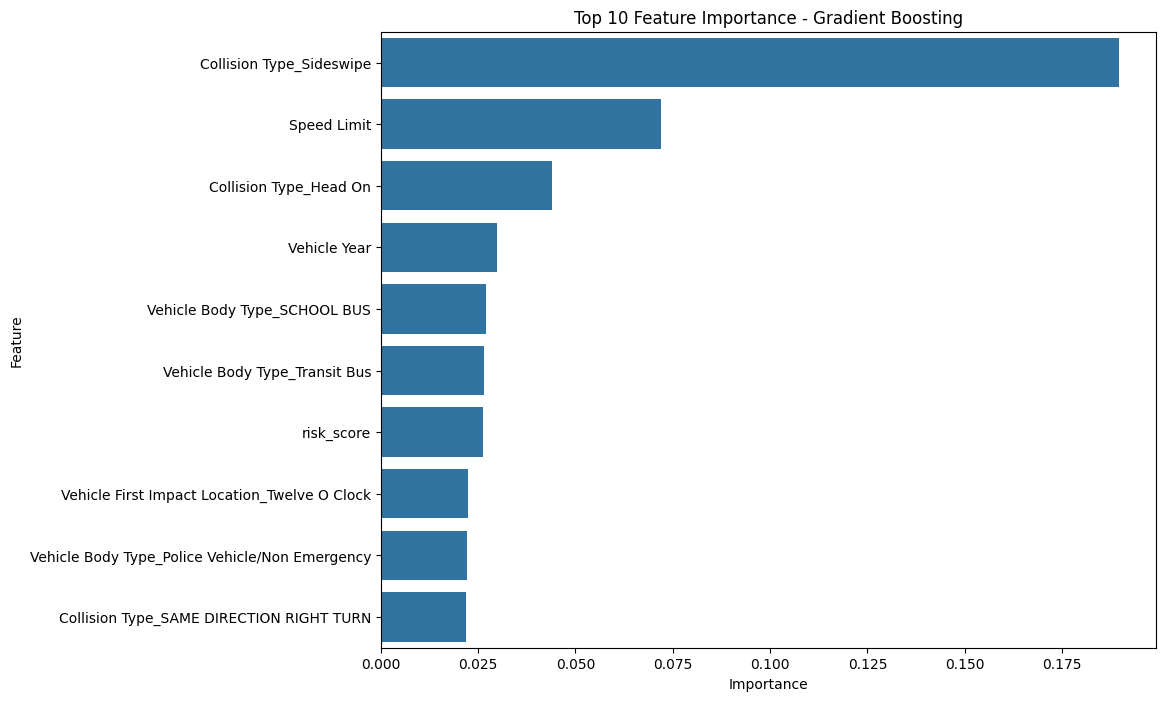

In [91]:
# Calculating feature importance for the Gradient Boosting model
gbc_importances = gbc.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': gbc_importances}).sort_values(by='Importance', ascending=False)
top_features = feature_importance.nlargest(10, 'Importance')

# Displaying the top 10 features and their importance
print(top_features)

# Plotting the feature importance graph
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top 10 Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


*****Part 2*****

*****Anomalies*****

In [92]:
df=data.copy()

columns=['Collision Type', 'Weather', 'Surface Condition',
 'Light', 'Traffic Control', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement',
 'Vehicle Going Dir', 'Vehicle First Impact Location','ACRS Report Type',
 'Vehicle Make', 'Vehicle Model']

##code by gpt##
# Label Encoding for Categorical Columns
def encode_categorical(df, columns):
    label_encoders = {}
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

df, encoders = encode_categorical(df, columns)

scaler = MinMaxScaler()
numerical_columns = df.columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])




In [93]:
# Anomaly detection functions
##code by gpt##
anomaly_scores = pd.Series(0, index=df.index)

def isolation_forest(df, columns):
    model = IsolationForest(contamination=0.05, random_state=42)
    preds = model.fit_predict(df[columns])
    global anomaly_scores
    anomaly_scores += (preds == -1).astype(int)

def local_outlier_factor(df, columns):
    model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    preds = model.fit_predict(df[columns])
    global anomaly_scores
    anomaly_scores += (preds == -1).astype(int)

def one_class_svm(df, columns):
    model = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
    preds = model.fit_predict(df[columns])
    global anomaly_scores
    anomaly_scores += (preds == -1).astype(int)

def boxplot_outliers(df, columns):
    global anomaly_scores
    for col in columns:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        is_anomaly = (df[col] < lower_bound) | (df[col] > upper_bound)
        anomaly_scores += is_anomaly.astype(int)

# Applying functions to numeric columns
isolation_forest(df, numerical_columns)
local_outlier_factor(df, numerical_columns)
one_class_svm(df, numerical_columns)
boxplot_outliers(df, numerical_columns)

# Filter rows that are identified as anomalies in 3 out of 4 tests
anomalies_to_remove = anomaly_scores[anomaly_scores >= 3].index

print(f"Remove {len(anomalies_to_remove)} anomalies")

Remove 11769 anomalies


In [94]:
# Removing anomalies from the data
filtered_df = data.drop(index=anomalies_to_remove)

*****clustering*****


In [95]:
# One-Hot Encoding
data_cluester = pd.get_dummies(filtered_df, columns=['Collision Type', 'Weather', 'Surface Condition',
 'Light', 'Traffic Control', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement',
 'Vehicle Going Dir', 'Vehicle First Impact Location','ACRS Report Type',
 'Vehicle Make', 'Vehicle Model'], drop_first=True)

# Normalize numeric columns
scaler = MinMaxScaler()
columns_to_normalize = ['Speed Limit', 'Vehicle Year']
data_cluester[columns_to_normalize] = scaler.fit_transform(data_cluester[columns_to_normalize])


#reduced data
sampled_df = data_cluester.sample(n=10000, random_state=42)


*****Examination of the dispersion*****

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


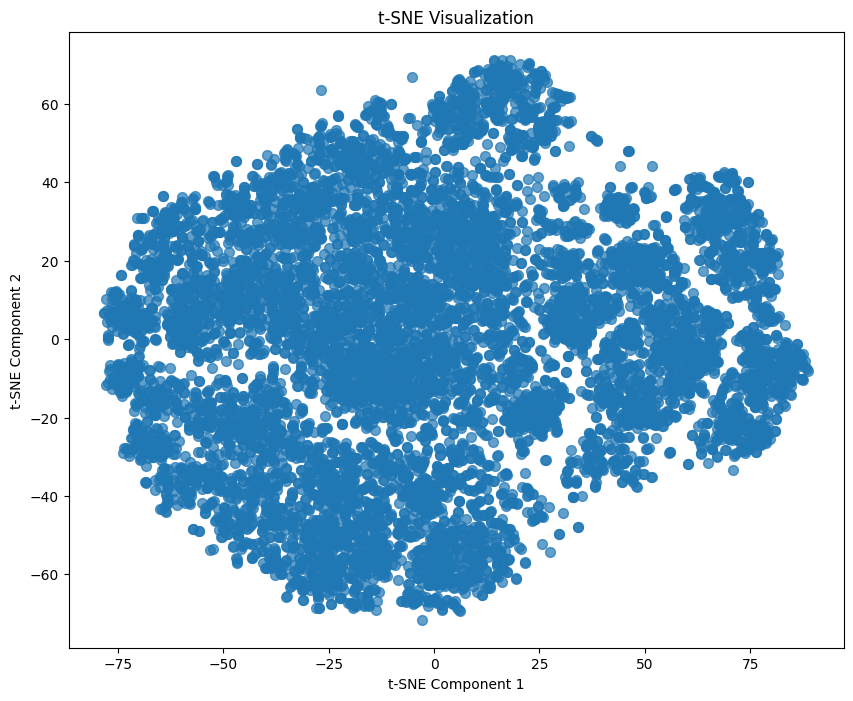

In [96]:
# Running t-SNE on all the data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(sampled_df)

# Drawing a scatter graph
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


The dispersion doesn't tell us anything, so we'll try all the clustering models we know

*****DBSCAN*****

EPS exam

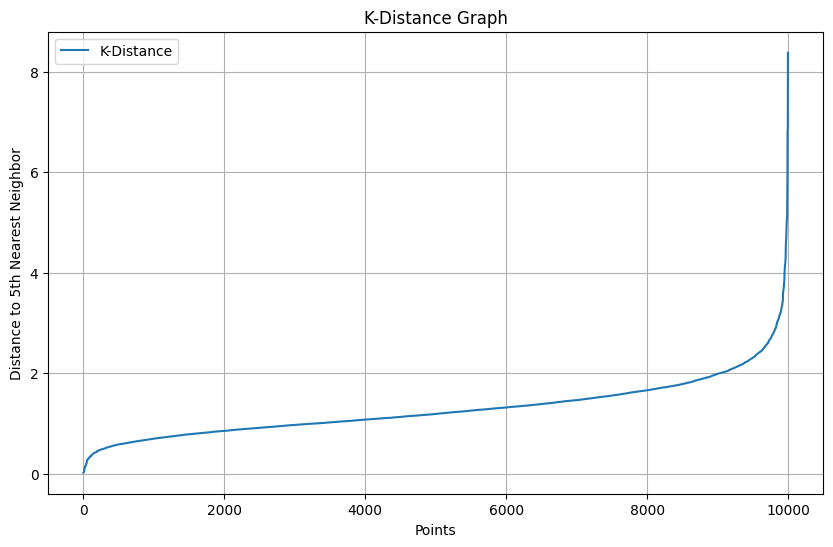

In [97]:
##code by gpt##
# Step 1: Calculate nearest neighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_embedded)  # using the tsne data (2d) to understand better the graph
distances, indices = nbrs.kneighbors(X_embedded)

# Step 2: Sort distances
distances = np.sort(distances[:, -1])

# Step 3: Plot the K-Distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances, label="K-Distance")
plt.title("K-Distance Graph")
plt.xlabel("Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.legend()
plt.grid()
plt.show()

After some experimentation, we came to the result

eps=2.4




Examination of a minimum of 15 to 25 samples

In [98]:
# Range of min_samples values
min_samples_range = range(15, 26)  # From 15 to 25

##code by gpt##
# Loop to check each value of min_samples
for min_samples_value in min_samples_range:
    print(f"\nTesting DBSCAN with min_samples={min_samples_value}")

    # DBSCAN
    dbscan = DBSCAN(eps=2.4, min_samples=min_samples_value)
    clusters = dbscan.fit_predict(sampled_df)

    # Adding clusters to the data
    sampled_df['Cluster'] = clusters

    # Check if more than one cluster was found
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Number of threads without noise
    num_noise = sum(clusters == -1)  # Number of noise points
    print(f"  Number of clusters (excluding noise): {num_clusters}")
    print(f"  Number of noise points: {num_noise}")

    # Removing noise points for calculating metrics
    valid_points = sampled_df[sampled_df['Cluster'] != -1]
    valid_clusters = valid_points['Cluster']
    valid_data = valid_points.drop(columns=['Cluster'])

    # Evaluation metrics (if there is more than one cluster)
    if num_clusters > 1:
        silhouette_avg = silhouette_score(valid_data, valid_clusters)
        db_index = davies_bouldin_score(valid_data, valid_clusters)
        ch_score = calinski_harabasz_score(valid_data, valid_clusters)

        print(f"  Silhouette Score: {silhouette_avg:.2f}")
        print(f"  Davies-Bouldin Index: {db_index:.2f}")
        print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    else:
        print("  Not enough clusters to calculate evaluation metrics.")

# Removing the cluster column to allow for additional calculations
sampled_df = sampled_df.drop(columns=['Cluster'])



Testing DBSCAN with min_samples=15
  Number of clusters (excluding noise): 2
  Number of noise points: 3156
  Silhouette Score: 0.05
  Davies-Bouldin Index: 1.97
  Calinski-Harabasz Index: 18.95

Testing DBSCAN with min_samples=16
  Number of clusters (excluding noise): 2
  Number of noise points: 3218
  Silhouette Score: 0.05
  Davies-Bouldin Index: 1.93
  Calinski-Harabasz Index: 18.65

Testing DBSCAN with min_samples=17
  Number of clusters (excluding noise): 2
  Number of noise points: 3276
  Silhouette Score: 0.05
  Davies-Bouldin Index: 1.95
  Calinski-Harabasz Index: 19.90

Testing DBSCAN with min_samples=18
  Number of clusters (excluding noise): 2
  Number of noise points: 3333
  Silhouette Score: 0.05
  Davies-Bouldin Index: 1.95
  Calinski-Harabasz Index: 19.92

Testing DBSCAN with min_samples=19
  Number of clusters (excluding noise): 2
  Number of noise points: 3389
  Silhouette Score: 0.05
  Davies-Bouldin Index: 1.95
  Calinski-Harabasz Index: 19.92

Testing DBSCAN with

23 min samples they provide the best balance between the evaluation metrics

In [99]:
##code by gpt##
#Running DBSCAN
dbscan = DBSCAN(eps=2.4, min_samples=23)
clusters = dbscan.fit_predict(sampled_df)

# Adding clusters to the original data
sampled_df['Cluster1'] = clusters

# Removing noise points for calculating metrics
valid_points = sampled_df[sampled_df['Cluster1'] != -1]
valid_clusters = valid_points['Cluster1']
valid_data = valid_points.drop(columns=['Cluster1'])

# Evaluation indicators
silhouette_avg_DBSCAN = silhouette_score(valid_data, valid_clusters)
db_index_DBSCAN = davies_bouldin_score(valid_data, valid_clusters)
ch_score_DBSCAN = calinski_harabasz_score(valid_data, valid_clusters)



*****K means******

Examining several clusters

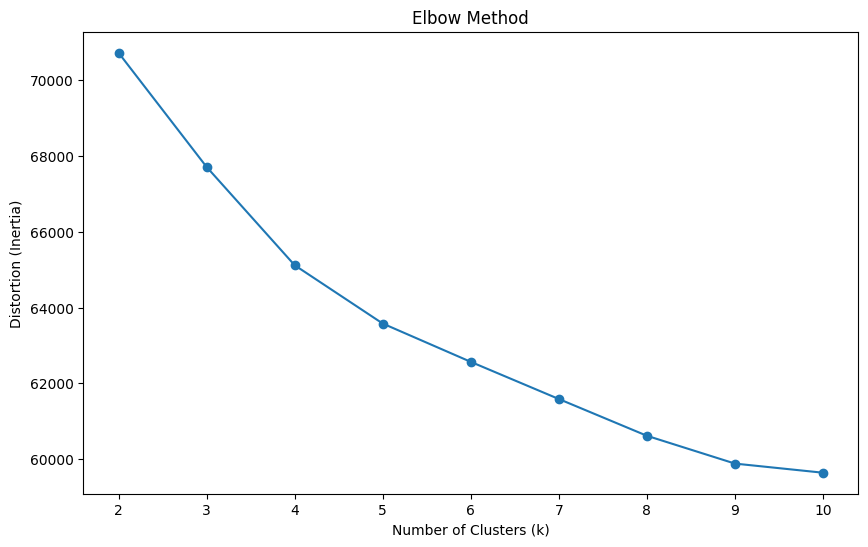

In [100]:
distortions = []
##code by gpt##
# Checking cluster numbers between 2 to 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(sampled_df)
    distortions.append(kmeans.inertia_)

# Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), distortions, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.show()


We will examine between 2 to 7 clusters

In [101]:
results = []
##code by gpt##
# Test for k from 2 to 7
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(sampled_df)

    # Adding the clusters to the data (temporary variable so as not to damage the source)
    sampled_df_temp = sampled_df.copy()
    sampled_df_temp[f'Cluster{k}'] = clusters

    # Calculation of evaluation indices
    silhouette_avg = silhouette_score(sampled_df_temp.drop(columns=[f'Cluster{k}']), clusters)
    db_index = davies_bouldin_score(sampled_df_temp.drop(columns=[f'Cluster{k}']), clusters)
    ch_score = calinski_harabasz_score(sampled_df_temp.drop(columns=[f'Cluster{k}']), clusters)

    # Saving the results
    results.append({
        'k': k,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Score': ch_score
    })

# Displaying the results
results_df = pd.DataFrame(results)
print(results_df)


   k  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score
0  2          0.062317              3.059062               742.952383
1  3          0.065769              3.758470               610.395937
2  4          0.070348              3.342133               555.797977
3  5          0.062529              3.401089               487.381964
4  6          0.054147              3.218840               428.476305
5  7          0.051508              3.403633               389.227117


 k=4, because it performs better on the metrics

In [102]:
##code by gpt##
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(sampled_df)

# Adding the clusters to the data
sampled_df['Cluster2'] = clusters

# Evaluation indicators
silhouette_avg_KMeans = silhouette_score(sampled_df.drop(columns=['Cluster2']), clusters)
db_index_KMeans = davies_bouldin_score(sampled_df.drop(columns=['Cluster2']), clusters)
ch_score_KMeans = calinski_harabasz_score(sampled_df.drop(columns=['Cluster2']), clusters)


*****Hierarchical*****

Hierarchical Clustering Dendrogram

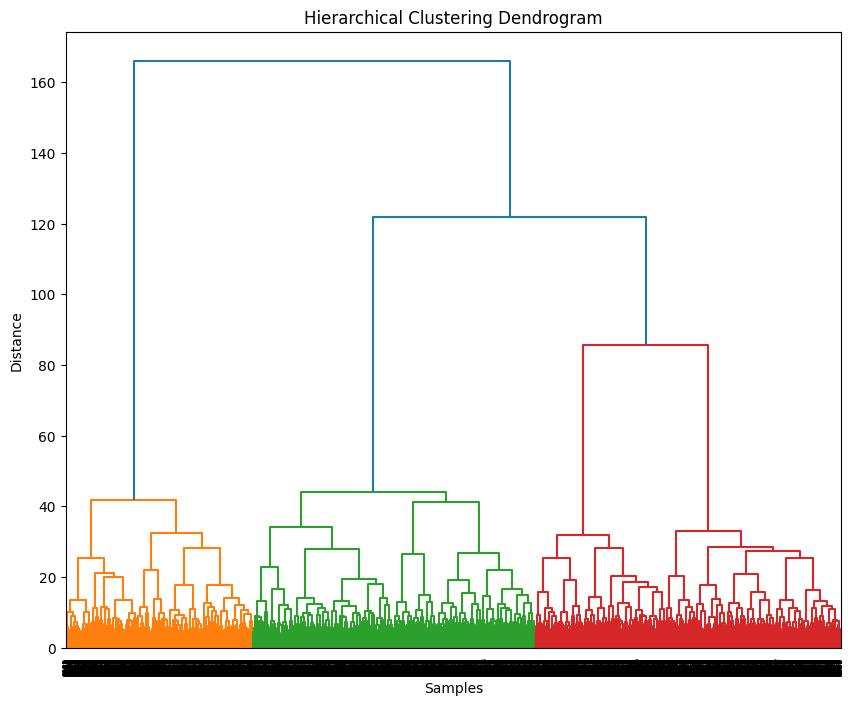

In [103]:
##code by gpt##
#Create a dendrogram
linked = linkage(sampled_df, method='ward')

# Displaying the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


We will examine between 2 and 3 clusters

In [104]:
###code by gpt###
#Function to run Agglomerative Clustering and calculate metrics
def evaluate_clustering(k, sampled_df):
    hierarchical = AgglomerativeClustering(n_clusters=k,metric= 'euclidean', linkage='ward')
    clusters = hierarchical.fit_predict(sampled_df)

    silhouette_avg = silhouette_score(sampled_df, clusters)
    db_index = davies_bouldin_score(sampled_df, clusters)
    ch_score = calinski_harabasz_score(sampled_df, clusters)

    print(f"Results for k={k}:")
    print(f"  Silhouette Score: {silhouette_avg:.2f}")
    print(f"  Davies-Bouldin Index: {db_index:.2f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print("=" * 50)


for k in [2,3]:
    evaluate_clustering(k, sampled_df)


Results for k=2:
  Silhouette Score: 0.15
  Davies-Bouldin Index: 1.90
  Calinski-Harabasz Index: 1800.89
Results for k=3:
  Silhouette Score: 0.12
  Davies-Bouldin Index: 2.55
  Calinski-Harabasz Index: 1534.24


k=2, because it performs better on the metrics

In [105]:
##code by gpt##
hierarchical = AgglomerativeClustering(n_clusters=2,metric= 'euclidean', linkage='ward')
clusters = hierarchical.fit_predict(sampled_df)

# Evaluation metrics
silhouette_avg_hierarchical = silhouette_score(sampled_df, clusters)
db_index_hierarchical = davies_bouldin_score(sampled_df, clusters)
ch_score_hierarchical = calinski_harabasz_score(sampled_df, clusters)

# Adding the clusters to the original data
sampled_df['Cluster3'] = clusters


                      Algorithm  Silhouette Score  Davies-Bouldin Index  \
0                   DBSCAN(k=2)          0.048470              1.883360   
1                  K-Means(k=4)          0.070348              3.342133   
2  Hierarchical Clustering(k=2)          0.153287              1.902224   

   Calinski-Harabasz Index  
0                18.446933  
1               555.797977  
2              1800.885837  


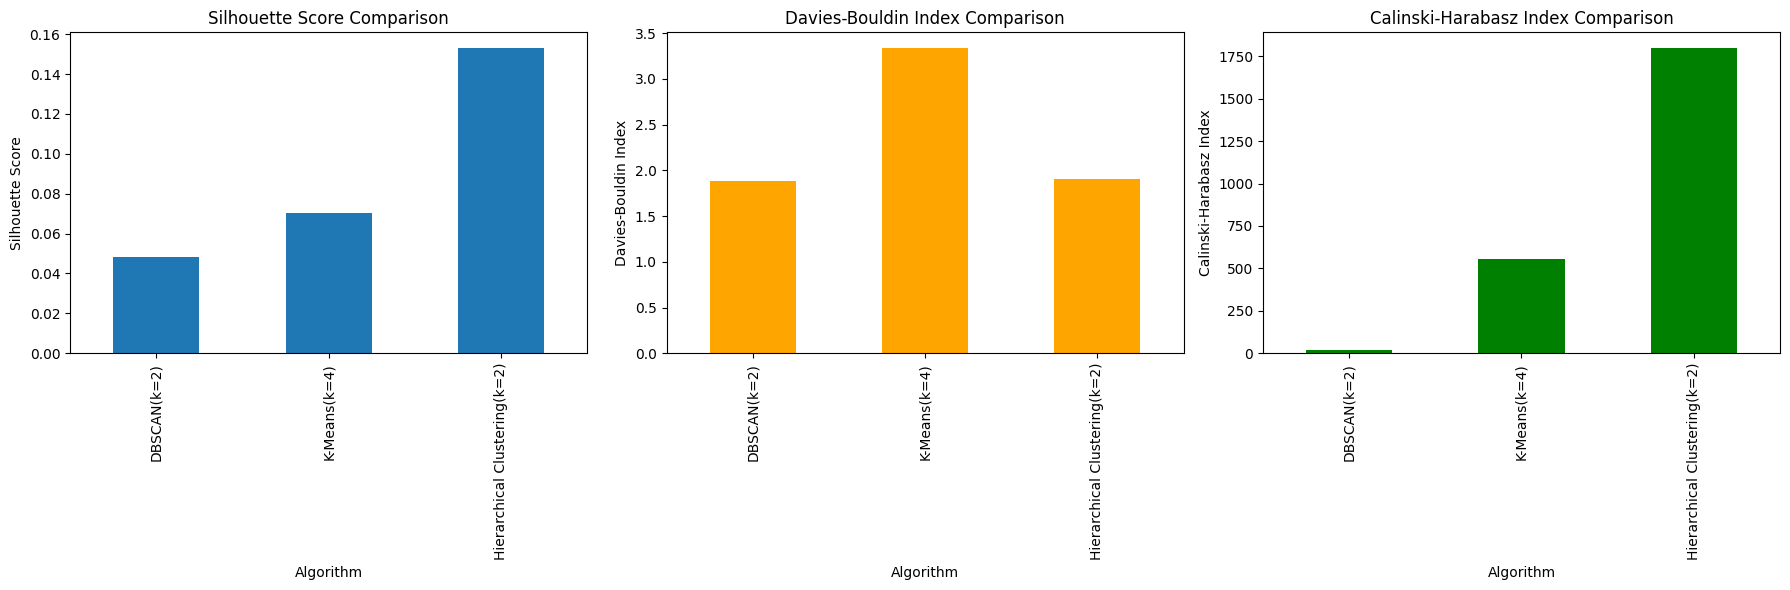

In [106]:
# Create the results dictionary
results = [
    {
        "Algorithm": "DBSCAN(k=2)",
        "Silhouette Score": silhouette_avg_DBSCAN,
        "Davies-Bouldin Index": db_index_DBSCAN,
        "Calinski-Harabasz Index": ch_score_DBSCAN
    },
    {
        "Algorithm": "K-Means(k=4)",
        "Silhouette Score": silhouette_avg_KMeans,
        "Davies-Bouldin Index": db_index_KMeans,
        "Calinski-Harabasz Index": ch_score_KMeans
    },
    {
        "Algorithm": "Hierarchical Clustering(k=2)",
        "Silhouette Score": silhouette_avg_hierarchical,
        "Davies-Bouldin Index": db_index_hierarchical,
        "Calinski-Harabasz Index": ch_score_hierarchical
    }
]

##code by gpt##
# Create a DataFrame from the results
comparison_cluester = pd.DataFrame(results)

# Display the table
print(comparison_cluester)

# Displaying the results in graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Silhouette Score
comparison_cluester.plot.bar(x="Algorithm", y="Silhouette Score", ax=axes[0], legend=False)
axes[0].set_title("Silhouette Score Comparison")
axes[0].set_ylabel("Silhouette Score")

# Davies-Bouldin Index
comparison_cluester.plot.bar(x="Algorithm", y="Davies-Bouldin Index", ax=axes[1], color="orange", legend=False)
axes[1].set_title("Davies-Bouldin Index Comparison")
axes[1].set_ylabel("Davies-Bouldin Index")

# Calinski-Harabasz Index
comparison_cluester.plot.bar(x="Algorithm", y="Calinski-Harabasz Index", ax=axes[2], color="green", legend=False)
axes[2].set_title("Calinski-Harabasz Index Comparison")
axes[2].set_ylabel("Calinski-Harabasz Index")

plt.tight_layout()
plt.show()


Comparing cluster indices

Based on the results of the three metrics, choosing the hierarchical clustering model is the most logical choice, as it offers a good balance between performance metrics, leading in the Silhouette Score and Calinski-Harabasz Index.

In [107]:
#Delete the column
columns_to_drop = [ 'Cluster1', 'Cluster2']
for col in columns_to_drop:
    if col in sampled_df.columns:
        sampled_df.drop(columns=[col], inplace=True)

sampled_df.rename(columns={'Cluster3': 'Cluster'}, inplace=True)


*****Displaying the clusters*****

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


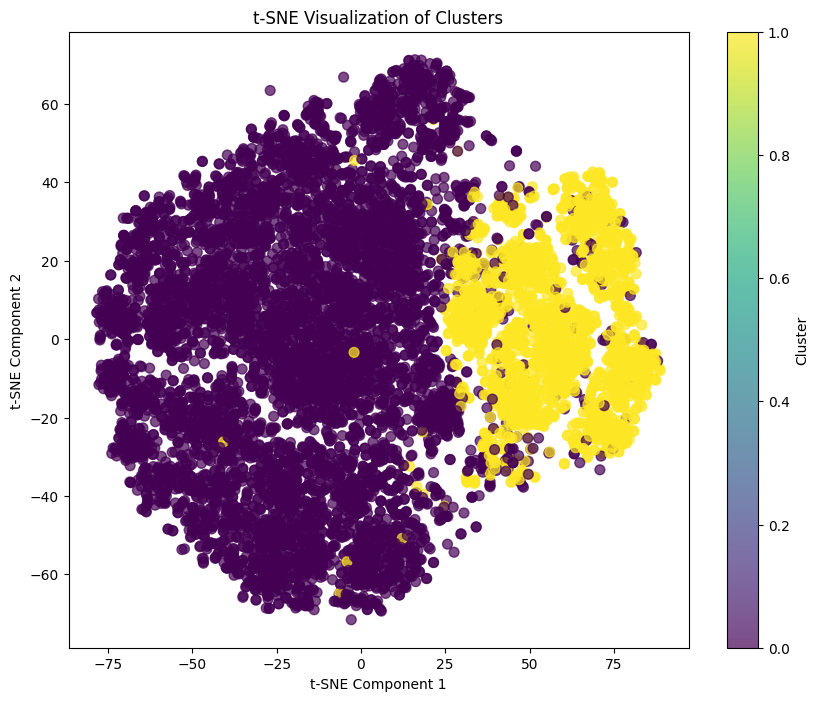

In [108]:
# Dimensionality reduction to 2 using t-SNE
X = sampled_df.drop(columns=['Cluster'])  # we don't want to include the Cluster column
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Scatter graph of the clusters with colors according to the cluster
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sampled_df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


*****Cluster analysis*****

In [109]:
# Calculate averages for each cluster
cluster_summary = sampled_df.groupby('Cluster').mean()

# Calculate standard deviation for each feature in the clusters
cluster_std = sampled_df.groupby('Cluster').std()

# Calculation of Coefficient of Variation (CV) - ratio of standard deviation to mean
cv = cluster_std / cluster_summary

# Displaying the features with the highest standard deviation and CV for each cluster
for cluster in sampled_df['Cluster'].unique():
    print(f"\nTop Features for Cluster {cluster}:")

    # Features with the highest standard deviation for the current cluster
    high_std_features = cluster_std.loc[cluster].sort_values(ascending=False).head(10)
    print("\nTop 10 Features by Standard Deviation:")
    print(high_std_features)

    # Features with highest CV for the current cluster
    high_cv_features = cv.loc[cluster].sort_values(ascending=False).head(10)
    print("\nTop 10 Features by Coefficient of Variation (CV):")
    print(high_cv_features)



Top Features for Cluster 1:

Top 10 Features by Standard Deviation:
Traffic Control_Traffic Signal              0.500094
Vehicle Movement_Stopped in Traffic Lane    0.498967
Traffic Control_No Controls                 0.497857
ACRS Report Type_Property Damage Crash      0.490857
ACRS Report Type_Injury Crash               0.490777
Vehicle Movement_Slowing or Stopping        0.488275
Vehicle Going Dir_South                     0.463952
Vehicle Going Dir_North                     0.462096
Light_Daylight                              0.434112
Vehicle Body Type_Passenger Car             0.425508
Name: 1, dtype: float64

Top 10 Features by Coefficient of Variation (CV):
Vehicle Model_CHALLENGER    49.183331
Vehicle Model_G35           49.183331
Vehicle Movement_Passing    49.183331
Vehicle Model_SONOTA        49.183331
Vehicle Make_HYUNDA         49.183331
Vehicle Model_G6            49.183331
Vehicle Model_525I          49.183331
Vehicle Model_328           49.183331
Vehicle Model_325I    

It's difficult to understand

In [110]:
# Count the number of items in each cluster
cluster_counts = sampled_df['Cluster'].value_counts()

# Display the number of items in each cluster
print("Number of items in each cluster:")
print(cluster_counts)

Number of items in each cluster:
Cluster
0    7581
1    2419
Name: count, dtype: int64


<ipython-input-111-16f5b5f7c62d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")


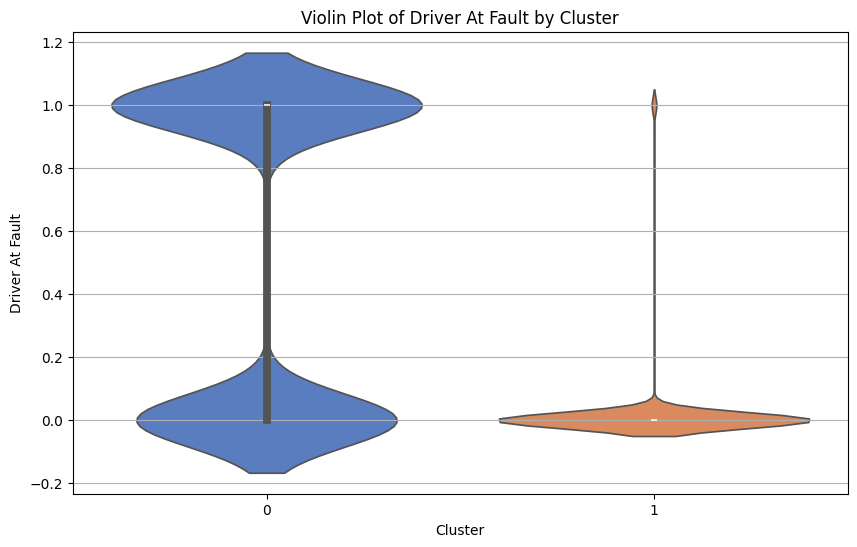

<ipython-input-111-16f5b5f7c62d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")


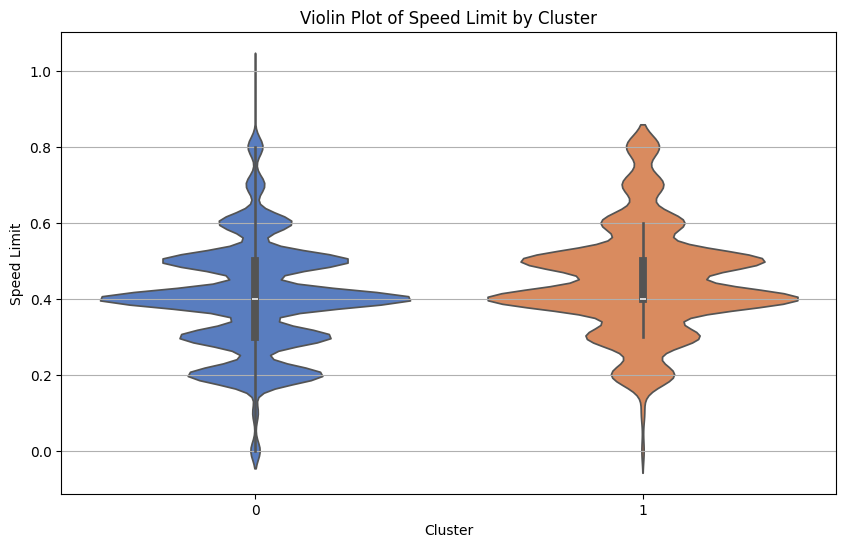

<ipython-input-111-16f5b5f7c62d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")


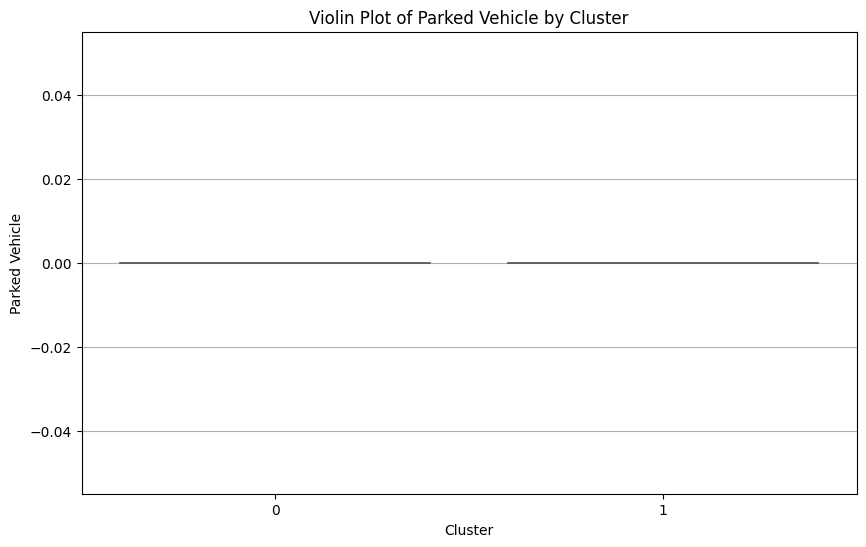

<ipython-input-111-16f5b5f7c62d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")


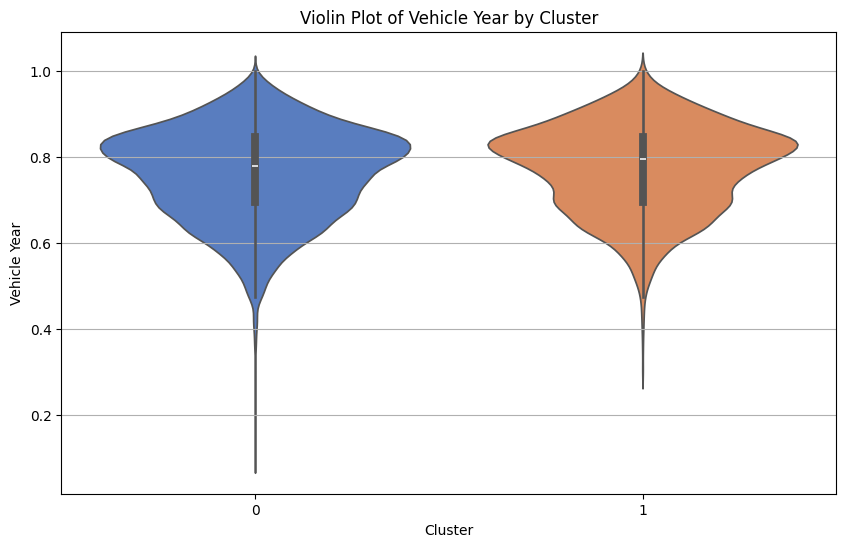

<ipython-input-111-16f5b5f7c62d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")


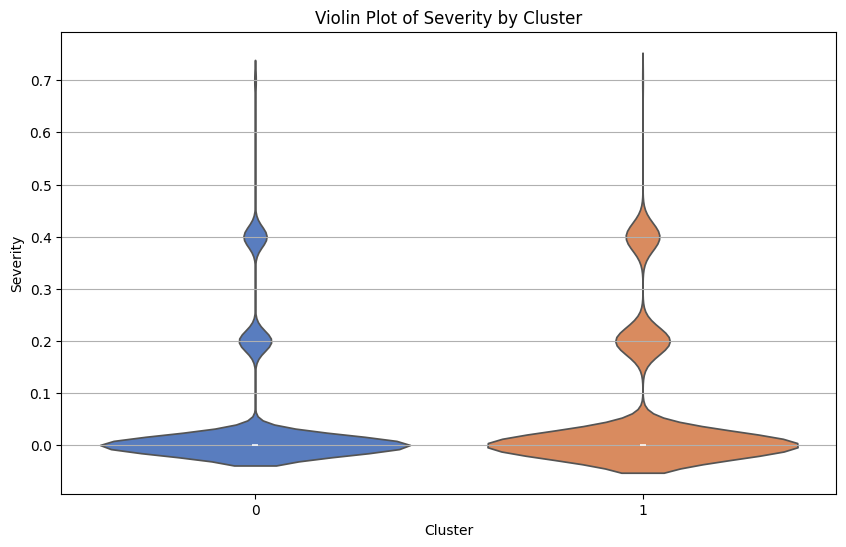

<ipython-input-111-16f5b5f7c62d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")


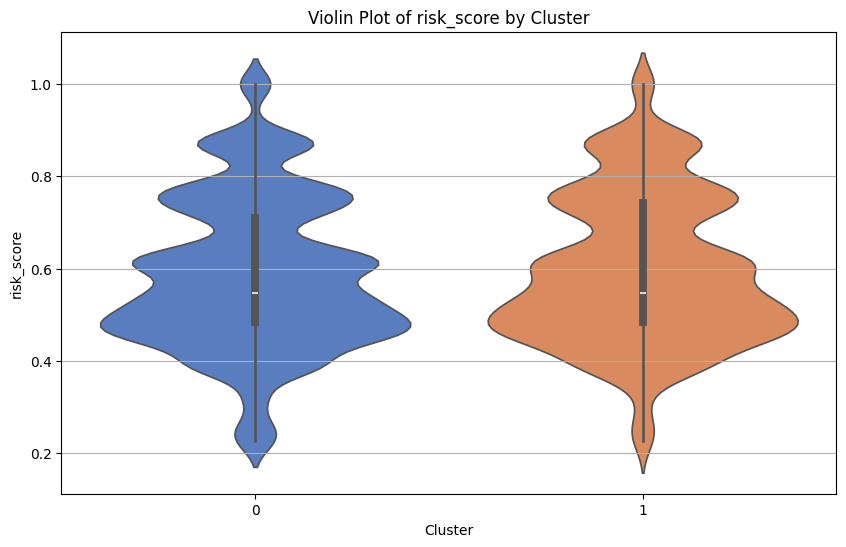

In [111]:
# Feature list (numeric columns only, except Cluster)
features = [col for col in sampled_df.columns if col != "Cluster" and sampled_df[col].dtype in ['float64', 'int64']]

# Creating a Violin Graph for Each Feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster', y=feature, data=sampled_df, inner="box", palette="muted")
    plt.title(f"Violin Plot of {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.grid(axis='y')
    plt.show()


In [112]:
sampled_df.head()

,Driver At Fault,Speed Limit,Parked Vehicle,Vehicle Year,Severity,risk_score,Collision Type_Front to Rear,Collision Type_Head On,Collision Type_OPPOSITE DIR BOTH LEFT TURN,Collision Type_Rear End,...,Vehicle Model_XT5,Vehicle Model_XTERRA,Vehicle Model_XTS,Vehicle Model_XX,Vehicle Model_Y,Vehicle Model_YARIS,Vehicle Model_YUKON,Vehicle Model_YUKON XL,Vehicle Model_Z4,Cluster
185886,0,0.4,0,0.576271,0.4,0.516129,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
170543,0,0.6,0,0.508475,0.2,0.870968,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
164557,0,0.4,0,0.881356,0.4,0.645161,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2370,0,0.4,0,0.762712,0.2,1.000000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0
132916,1,0.5,0,0.796610,0.0,0.483871,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


To understand the impact of each column on the group, we will create a predictive model

In [113]:
##code by gpt##
# Filter data: ensure irrelevant columns are excluded
X = sampled_df.drop(columns=['Cluster'])  # All columns except 'Cluster'
y = sampled_df['Cluster']  # The 'Cluster' column as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation to assess the model's performance
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")



Accuracy: 0.9855
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1530
           1       0.98      0.96      0.97       470

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

Cross-validation scores: [0.9875 0.99   0.9855 0.9915 0.9865]
Average cross-validation score: 0.9882


check which features are the strongest in influencing the decision (there is a difference)

In [114]:
feature_importance = model.feature_importances_

# Creating a DataFrame to display feature importance with corresponding feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 30 most important features
top_30_features = feature_importance_df.head(30)
print("\nTop 30 Features by Importance:")
print(top_30_features)


Top 30 Features by Importance:
                                          Feature  Importance
138     Vehicle First Impact Location_Six O Clock    0.224391
9                         Collision Type_Rear End    0.149640
141  Vehicle First Impact Location_Twelve O Clock    0.094328
0                                 Driver At Fault    0.088626
124      Vehicle Movement_Stopped in Traffic Lane    0.082283
113        Vehicle Movement_Moving Constant Speed    0.047568
120          Vehicle Movement_Slowing or Stopping    0.036940
59            Driver Distracted By_Not Distracted    0.018932
7                          Collision Type_Head On    0.016072
130  Vehicle First Impact Location_Eleven O Clock    0.014583
13                       Collision Type_Sideswipe    0.012396
135     Vehicle First Impact Location_One O Clock    0.010786
56    Driver Distracted By_Looked but did not see    0.010235
1                                     Speed Limit    0.010044
3                                    V

less than 1% importance is less relevant to understand the impact on the cluster

In [115]:
# Filtering features with importance less than 1%
threshold = 0.01  # Threshold of 1%
filtered_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]

# Displaying the filtered features
print("\nFeatures with Importance >= 1%:")
print(filtered_features)

#save as a list
filtered_features = filtered_features['Feature'].tolist()



Features with Importance >= 1%:
                                          Feature  Importance
138     Vehicle First Impact Location_Six O Clock    0.224391
9                         Collision Type_Rear End    0.149640
141  Vehicle First Impact Location_Twelve O Clock    0.094328
0                                 Driver At Fault    0.088626
124      Vehicle Movement_Stopped in Traffic Lane    0.082283
113        Vehicle Movement_Moving Constant Speed    0.047568
120          Vehicle Movement_Slowing or Stopping    0.036940
59            Driver Distracted By_Not Distracted    0.018932
7                          Collision Type_Head On    0.016072
130  Vehicle First Impact Location_Eleven O Clock    0.014583
13                       Collision Type_Sideswipe    0.012396
135     Vehicle First Impact Location_One O Clock    0.010786
56    Driver Distracted By_Looked but did not see    0.010235
1                                     Speed Limit    0.010044


In [116]:
# Calculate the average values for each feature in each group
cluster_means = sampled_df.groupby('Cluster').mean()


sorted_cluster_means = cluster_means[filtered_features]
print("Mean values for each feature in each cluster (sorted):")
sorted_cluster_means

Mean values for each feature in each cluster (sorted):


,Vehicle First Impact Location_Six O Clock,Collision Type_Rear End,Vehicle First Impact Location_Twelve O Clock,Driver At Fault,Vehicle Movement_Stopped in Traffic Lane,Vehicle Movement_Moving Constant Speed,Vehicle Movement_Slowing or Stopping,Driver Distracted By_Not Distracted,Collision Type_Head On,Vehicle First Impact Location_Eleven O Clock,Collision Type_Sideswipe,Vehicle First Impact Location_One O Clock,Driver Distracted By_Looked but did not see,Speed Limit
Cluster,,,,,,,,,,,,,,
0,0.019786,0.209207,0.511278,0.543860,0.032186,0.524601,0.098272,0.748846,0.166469,0.099327,0.137317,0.113441,0.168184,0.397256
1,0.962795,0.944192,0.010748,0.014469,0.466308,0.051261,0.391897,0.996693,0.001240,0.002067,0.002894,0.001240,0.000413,0.445597


### **Cluster Distribution:**

- **Cluster 0**: Contains **7,581 items** (approximately 75.8% of the total dataset).  
- **Cluster 1**: Contains **2,419 items** (approximately 24.2% of the total dataset).  


### **Cluster 0:**
- **Impact Location and Driver Fault**:  
  - 51.13% of collisions occur at 12 o’clock (front-end), indicating that the driver is at fault in most cases.  
  - Only 1.98% of collisions occur at 6 o’clock (rear-end), where the driver is typically not at fault.  

- **Driver Behavior**:  
  - Drivers are at fault in 54.39% of cases, aligning with the high frequency of front-end collisions.  
  - Most vehicles are moving at a constant speed (52.46%), while 9.83% are slowing down, and 3.21% are stopped in traffic lanes.  

- **Distractions**:  
  - 74.88% of drivers are not distracted, but 16.82% "looked but did not see," which may explain some of the front-end collisions.  

- **Normalized Speed Limit**:  
  - The average normalized speed limit is **0.397**, indicating areas with relatively lower speed limits.

---

### **Cluster 1:**
- **Impact Location and Driver Fault**:  
  - 96.28% of collisions occur at 6 o’clock (rear-end), indicating that the driver is almost never at fault.  
  - Only 1.07% of collisions occur at 12 o’clock (front-end).  

- **Driver Behavior**:  
  - Drivers are rarely at fault (only 1.44%).  
  - 46.63% of vehicles are stopped in traffic, 39.19% are slowing down, and only 5.13% are moving at a constant speed.  

- **Distractions**:  
  - Nearly all drivers (99.67%) are not distracted, suggesting that the primary cause of these accidents is the behavior of other vehicles.  

- **Normalized Speed Limit**:  
  - The average normalized speed limit is **0.445**, indicating areas with slightly higher speed limits.

---

### **Summary:**
- **Cluster 0** describes front-end collisions where the driver is usually at fault. These accidents occur primarily in areas with lower speed limits, with vehicles moving or slowing down.  
- **Cluster 1** represents rear-end collisions where the driver is almost never at fault. These accidents occur in areas with slightly higher speed limits, with vehicles often stopped or slowing down.  